In [91]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [92]:
from google.colab import files
uploaded = files.upload()

Saving heart3.csv to heart3.csv


In [93]:
data = pd.read_csv('heart3.csv')
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [94]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [95]:
cols_with_missing = data.loc[:, data.isna().any()].columns.tolist()
print(cols_with_missing)

[]


In [96]:
data.shape

(270, 14)

In [97]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [98]:
encoded_cat_features = data[[col for col in data.columns if data[col].nunique()<=3 and col!='Heart Disease']]
discrete_features = data[[col for col in data.columns if col not in encoded_cat_features and col not in ['ST depression','Heart Disease']]]
contd_features = data[['ST depression']]

print("Encoded Categorical Features: ", encoded_cat_features)
print("Discrete Features: ", discrete_features)
print("Continuous Features: ", contd_features)

Encoded Categorical Features:       Sex  FBS over 120  EKG results  Exercise angina  Slope of ST  Thallium
0      1             0            2                0            2         3
1      0             0            2                0            2         7
2      1             0            0                0            1         7
3      1             0            0                1            2         7
4      0             0            2                1            1         3
..   ...           ...          ...              ...          ...       ...
265    1             1            0                0            1         7
266    1             0            0                0            1         7
267    0             0            2                0            2         3
268    1             0            0                0            2         6
269    1             0            2                1            2         3

[270 rows x 6 columns]
Discrete Features:       Age  Che

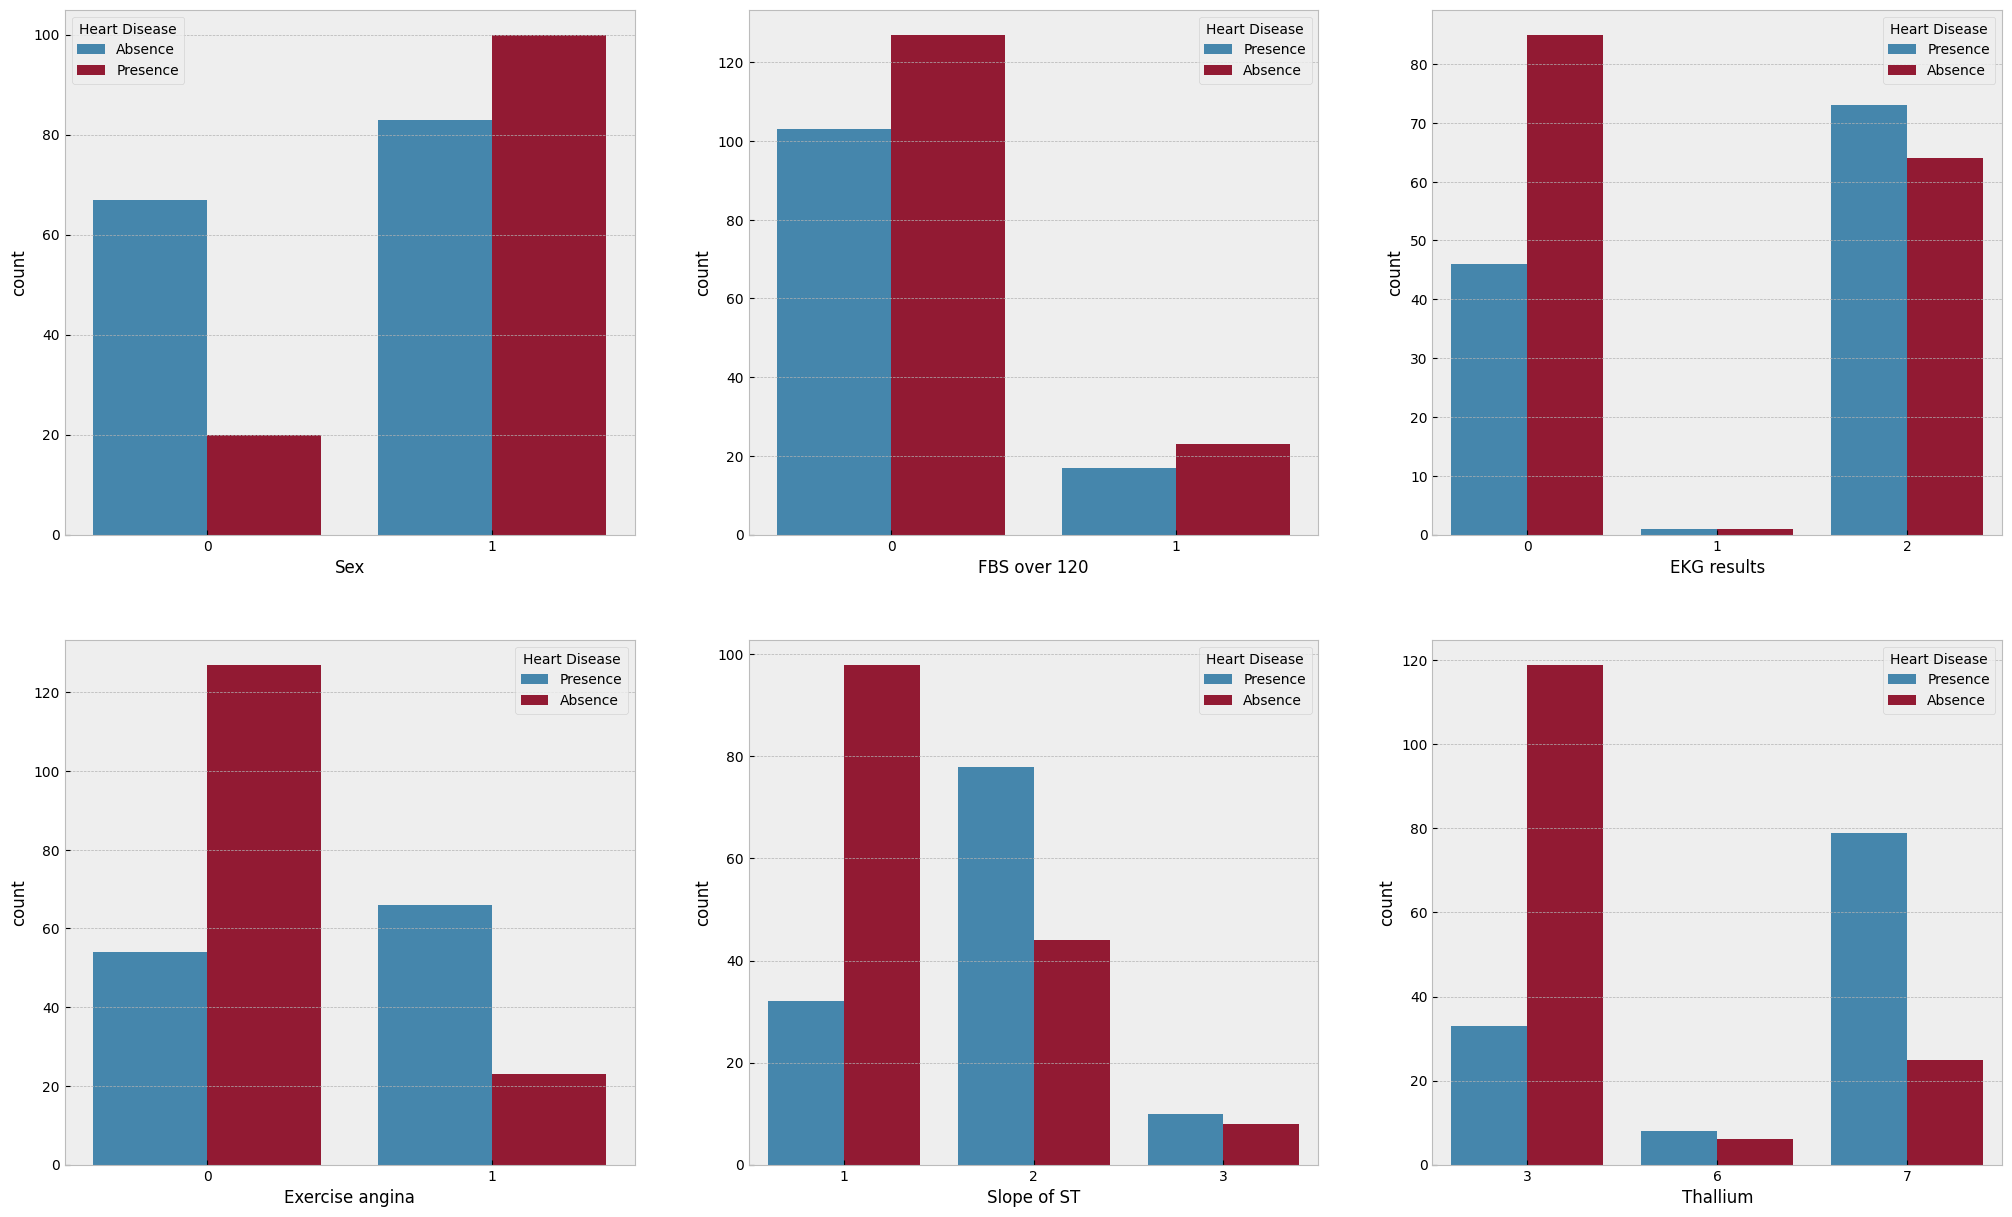

In [99]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25,15))
for i, subplots in zip(encoded_cat_features, ax.flatten()):
    sns.countplot(x = encoded_cat_features[i], hue = data['Heart Disease'], ax = subplots)
plt.show()

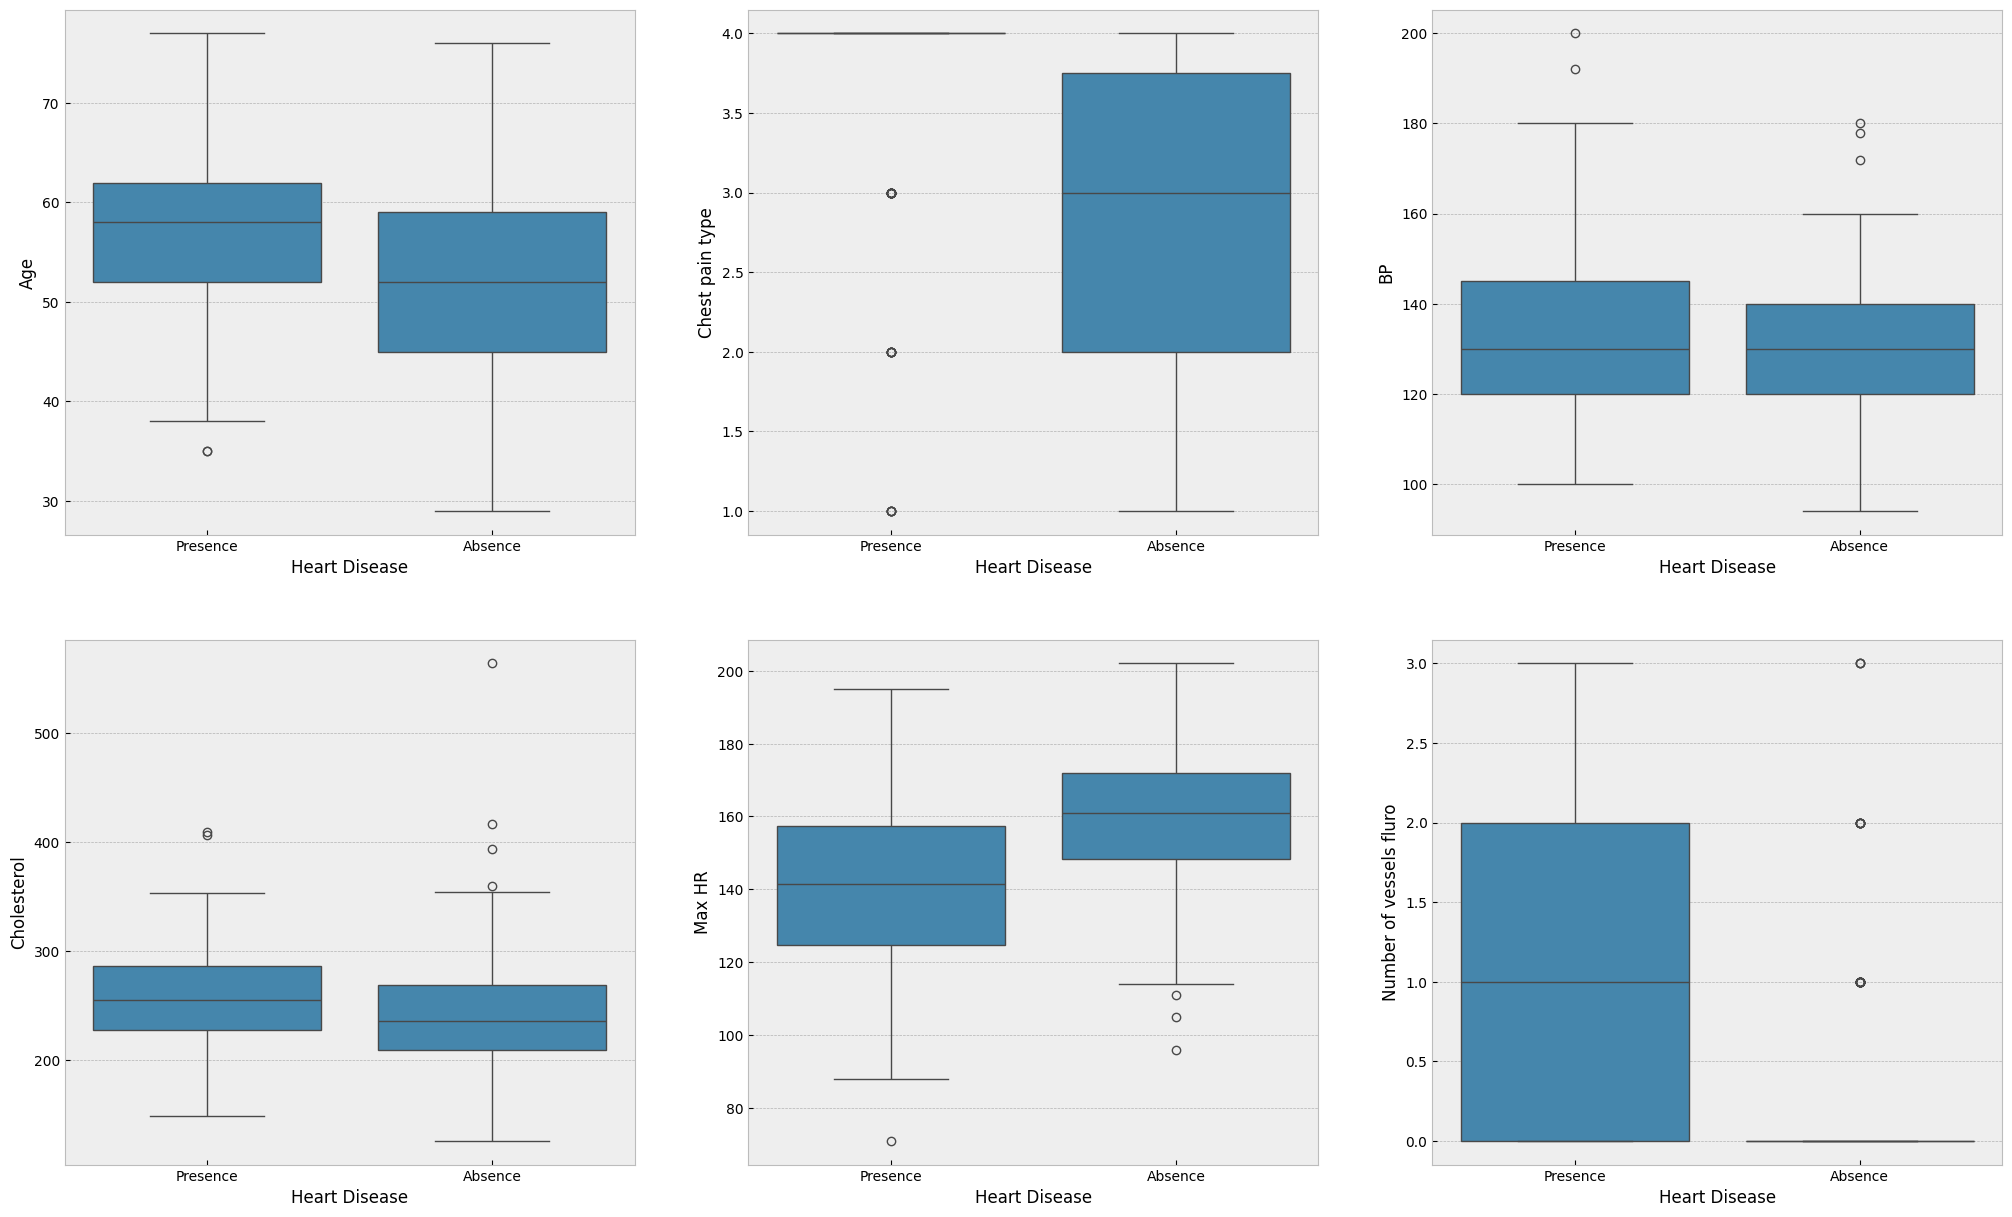

In [100]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25,15))
for i, subplots in zip(discrete_features, ax.flatten()):
    sns.boxplot(x = data['Heart Disease'], y = discrete_features[i], ax = subplots)
plt.show()

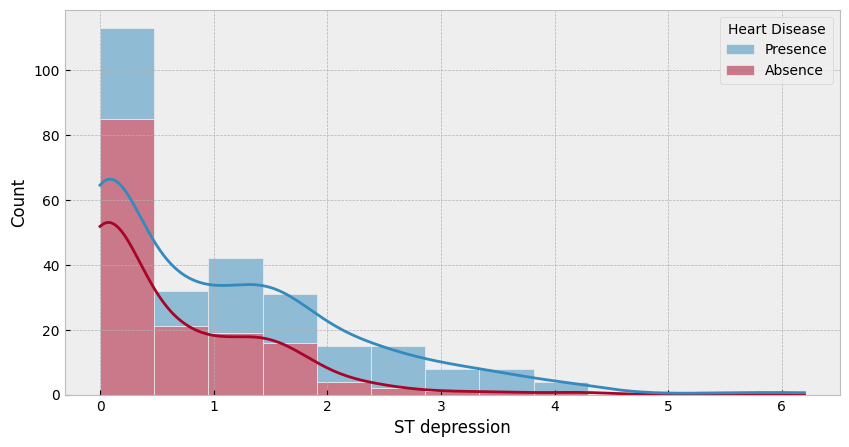

In [101]:
plt.figure(figsize = (10,5))
sns.histplot(data = data, x = 'ST depression', hue = 'Heart Disease', kde = True, multiple = 'stack')
plt.show()

In [102]:
df = data.copy()
X = df.drop('Heart Disease', axis = 1)
y = df.pop('Heart Disease')

In [103]:
X.shape, y.shape

((270, 13), (270,))

In [104]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((216, 13), (54, 13), (216,), (54,))

In [105]:
X_train.dtypes

,0
Age,int64
Sex,int64
Chest pain type,int64
BP,int64
Cholesterol,int64
FBS over 120,int64
EKG results,int64
Max HR,int64
Exercise angina,int64
ST depression,float64


In [106]:
disf_temp = X_train.select_dtypes(include = ['int64'])
disf_temp

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,Slope of ST,Number of vessels fluro,Thallium
115,49,0,2,134,271,0,0,162,0,2,0,3
33,59,1,4,170,326,0,2,140,1,3,0,7
184,53,1,3,130,246,1,2,173,0,1,3,3
142,50,1,3,140,233,0,0,163,0,2,1,7
197,54,0,3,110,214,0,0,158,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20,67,1,4,120,229,0,2,129,1,2,2,7
188,62,0,4,140,394,0,2,157,0,2,0,3
71,57,0,4,120,354,0,0,163,1,1,0,3
106,51,1,3,100,222,0,0,143,1,2,0,3


In [107]:
discrete_features_indices = [X_train.columns.get_loc(col) for col in disf_temp if col in X_train.columns]
discrete_features_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]

In [108]:
def make_mi_scores(X, y, discrete_features):
    result = mutual_info_classif(X_train, y_train, discrete_features=discrete_features_indices)
    result = pd.Series(result, name="MI Scores", index=X_train.columns)
    result = result.sort_values(ascending=False)
    return result

In [109]:
miscores = make_mi_scores(X_train, y_train, discrete_features)
miscores

,MI Scores
Cholesterol,0.454501
Max HR,0.249229
Chest pain type,0.151677
Thallium,0.147921
Age,0.137616
BP,0.123930
Number of vessels fluro,0.113429
ST depression,0.111208
Exercise angina,0.105134
Slope of ST,0.089309


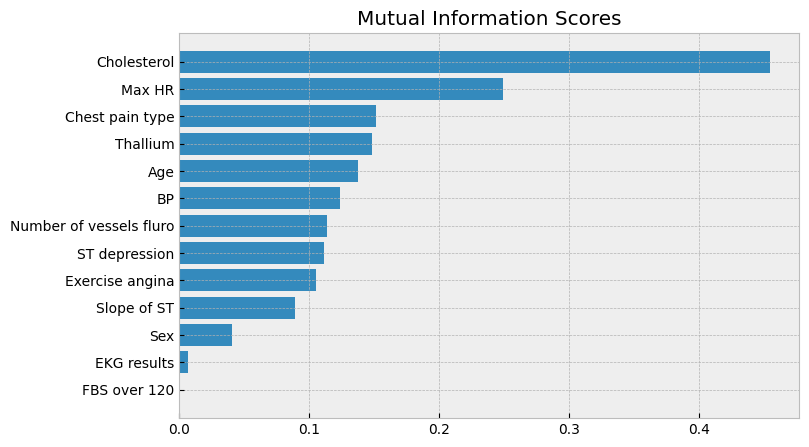

In [110]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(miscores)

In [111]:
selected_features = miscores[miscores > 0.12].index
selected_features

Index(['Cholesterol', 'Max HR', 'Chest pain type', 'Thallium', 'Age', 'BP'], dtype='object')

In [112]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_valid)

In [113]:
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9074074074074074


In [114]:
class_report = classification_report(y_valid, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

     Absence       0.89      0.97      0.93        33
    Presence       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

